In [1]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'iframe_connected'
pio.renderers.default = 'iframe_connected'

# Project :
 ## Car Sales Analysis 

In [2]:
df=pd.read_csv(r"/kaggle/input/mock-dataset-of-second-hand-car-sales/car_sales_data.csv")

# Data Info 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [4]:
df.shape

(50000, 7)

In [5]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


# Data Cleaning & Handling 

In [6]:
df.isna().sum()
df.duplicated().sum()

12

# EDA & Visualization

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


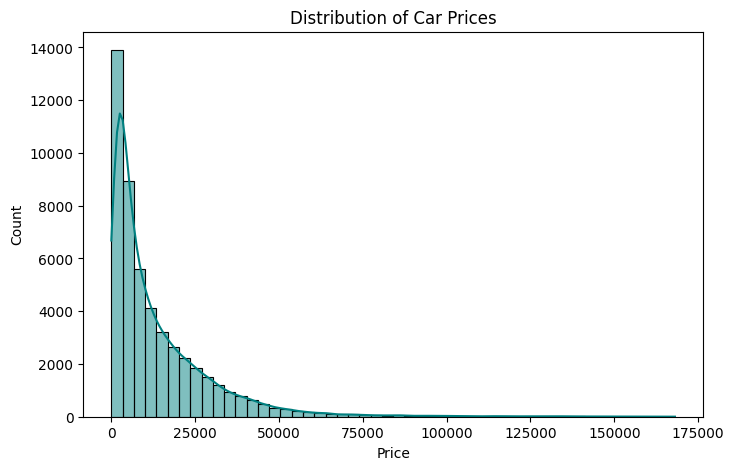

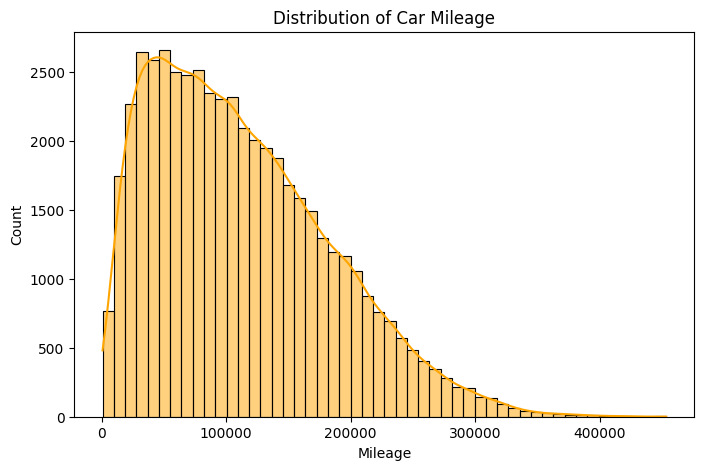

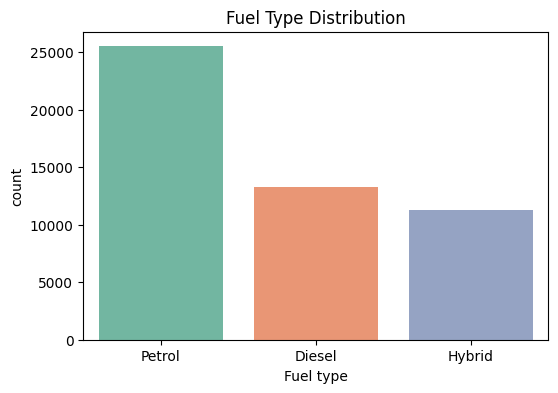

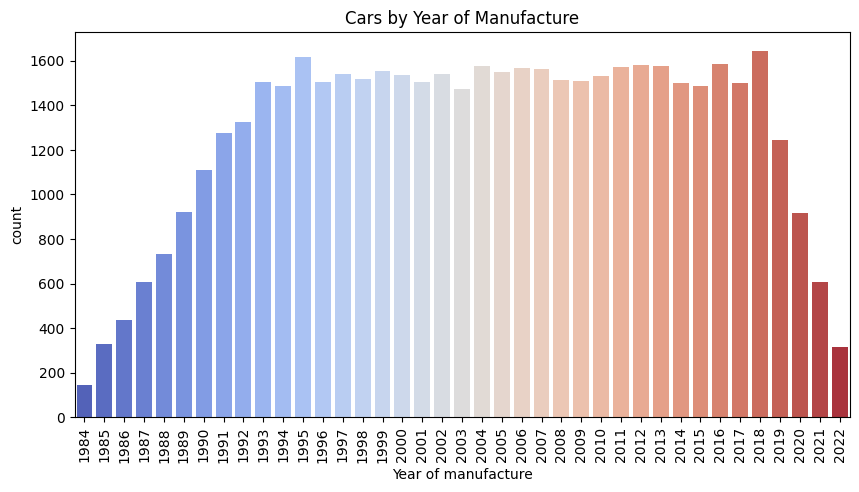

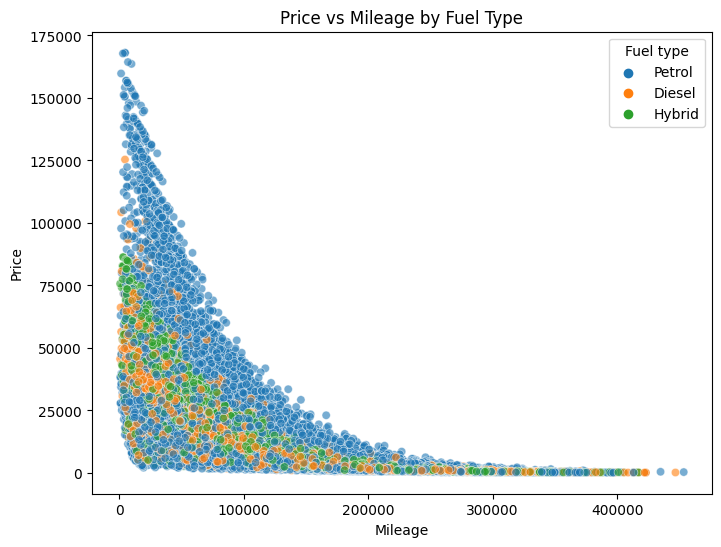

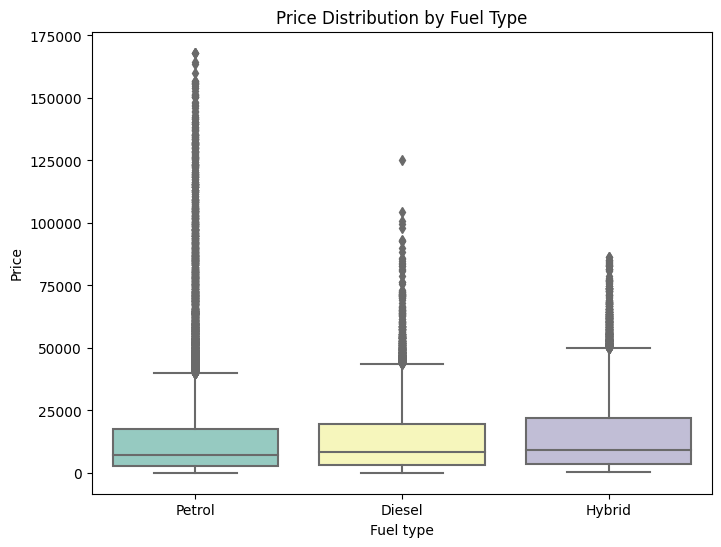

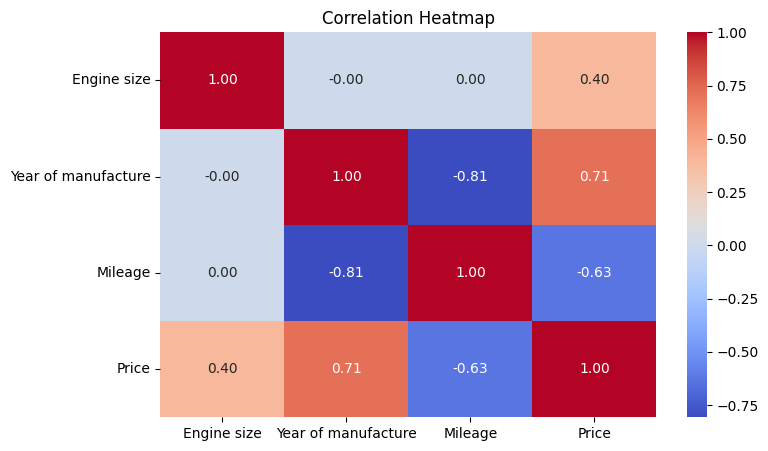

In [8]:
import plotly.graph_objects as go


# ===============================
# 📊 Univariate Analysis
# ===============================

# Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=50, kde=True, color="teal")
plt.title("Distribution of Car Prices")
plt.show()

# Mileage Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Mileage"], bins=50, kde=True, color="orange")
plt.title("Distribution of Car Mileage")
plt.show()

# Fuel Type Count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Fuel type", palette="Set2")
plt.title("Fuel Type Distribution")
plt.show()

# Year of Manufacture Count
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Year of manufacture", palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Cars by Year of Manufacture")
plt.show()

# ===============================
# 📊 Bivariate / Multivariate
# ===============================

# Price vs Mileage
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Mileage", y="Price", hue="Fuel type", alpha=0.6)
plt.title("Price vs Mileage by Fuel Type")
plt.show()

# Price vs Engine Size
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Fuel type", y="Price", palette="Set3")
plt.title("Price Distribution by Fuel Type")
plt.show()

# ===============================
# 🌐 Interactive Plots (Plotly)
# ===============================

# Interactive Scatter Price vs Mileage
fig = px.scatter(df, x="Mileage", y="Price", color="Fuel type",
                 size="Engine size", hover_data=["Manufacturer","Model"],
                 title="Price vs Mileage (Interactive)")
fig.show()

# Interactive Histogram of Prices
fig = px.histogram(df, x="Price", nbins=50, color="Fuel type",
                   title="Interactive Car Price Distribution")
fig.show()

# Interactive Boxplot by Manufacturer (Top 20)
top_makes = df["Manufacturer"].value_counts().head(20).index
fig = px.box(df[df["Manufacturer"].isin(top_makes)],
             x="Manufacturer", y="Price", color="Fuel type",
             title="Price Distribution by Top Manufacturers")
fig.update_xaxes(categoryorder="total descending")
fig.show()

# Year vs Price Interactive Trend
fig = px.scatter(df, x="Year of manufacture", y="Price",
                 color="Fuel type", hover_data=["Manufacturer","Model"],
                 title="Car Price Trend Over Years")
fig.show()

# ===============================
# 📊 Correlation Heatmap
# ===============================
corr = df[["Engine size","Year of manufacture","Mileage","Price"]].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Interactive Correlation Heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale="Viridis"))
fig.update_layout(title="Interactive Correlation Heatmap")
fig.show()